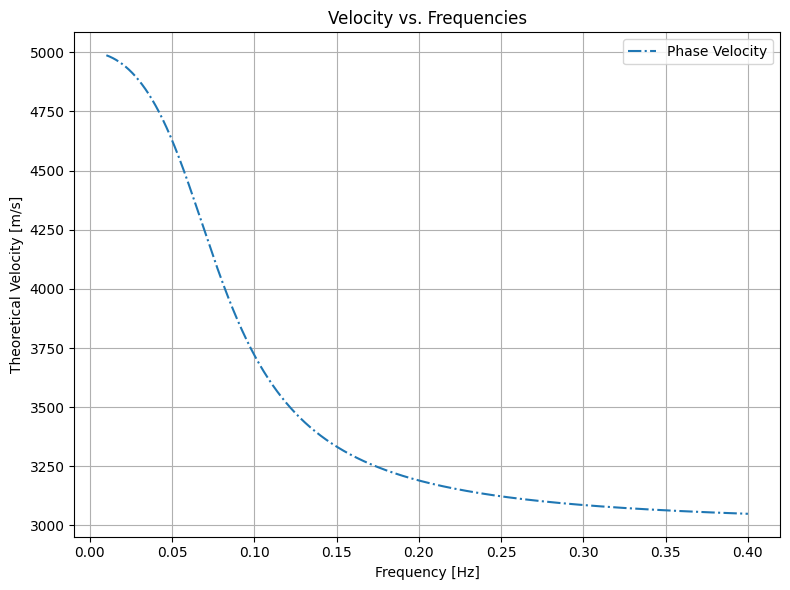

In [1]:
import numpy as np
import matplotlib.pyplot as plt

with open("../data/data.bin", "rb") as f:
    size = np.fromfile(f, dtype=np.uintp, count=1)[0]
    frequencies = np.fromfile(f, dtype=np.float64, count=size)
    c_theoretical = np.fromfile(f, dtype=np.float64, count=size)

# plt.figure(figsize = (18, 6))
plt.figure(figsize = (8, 6))
plt.plot(frequencies, c_theoretical, '-.', label = 'Phase Velocity')
plt.xlabel("Frequency [Hz]")
plt.ylabel("Theoretical Velocity [m/s]")
plt.title("Velocity vs. Frequencies")
plt.grid(True)
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.savefig("../plot/c-omega.pdf", dpi = 300)
plt.show()